## Comparison of different types of image kernels through Convolution

### Created by: Kavin Fidel<br>


### Importing Libraries

Libraries used:<br>
* Numpy
* matplotlib
* Pillow

In [8]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [9]:

img = Image.open(r'\Users\ADMIN\Documents\Fidel_Sem5\dsp_project\IMG_20220725_173151.jpg')
# Image is opened
img = ImageOps.grayscale(img)
# Turning to grayscale
img = img.resize(size = (200,200)) # We resize the image



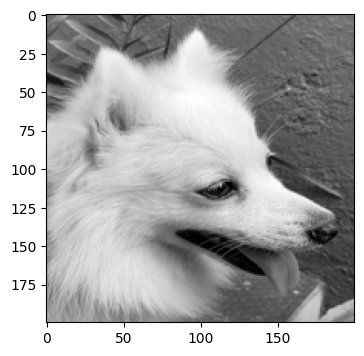

In [10]:
plt.figure(figsize = (4,4))
plt.imshow(img, cmap = 'gray')
# Plotting the image

### Types of Kernels


Kernels used<br> 
* sharp<br> 
* blur<br> 
* outline<br>
* emboss<br>

In [21]:
sharp = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([
    [0.0625, 0.125, 0.0625],
    [0.125,  0.25,  0.125],
    [0.0625, 0.125, 0.0625]
])

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

emboss = np.array([[-2, -1,  0,],
[-1,  1,  1],
 [0,  1,  2]
])

### Calulating Target Size

The target size essential is the size of the image after it has been convolved with the filter(blur or sharp or border)

In [12]:
def calculate_target_size(img_size:int, kernel_size:int) -> int:
  pixels = 0

  for i in range(img_size):
    added = i + kernel_size # adding the kernel size

    if added <= img_size:
      pixels += 1 # number of pixels is incremented

  return pixels



### Defining the convolution function

In [14]:
def convolution(img: np.array, kernel : np.array) -> np.array:
    # The function accepts the images as numpy arrays.
    target_size = calculate_target_size(
        img_size = img.shape[0],
        kernel_size = kernel.shape[0]
    )
    k = kernel.shape[0] # This will be used inside the for loop

    conv_img = np.zeros(shape =(target_size, target_size))
    # we are initializing the convolved image with np.zeros

    # Performing convolution by using 2 for loops
    for i in range(target_size): # Iterating throughout the rows
      for j in range(target_size): # Iterating throughout the columns
        mat = img[i:i+k, j:j+k] # Here we create "mat", which takes each element across the rows and columns of the image.

        conv_img[i,j] = np.sum(np.multiply(mat,kernel))
      # Here we are using numpy's inbuilt function to perform multiplication and summation element wise
    return conv_img


### Blurred Image

In [15]:
image_blur = convolution(img = np.array(img), kernel = blur)

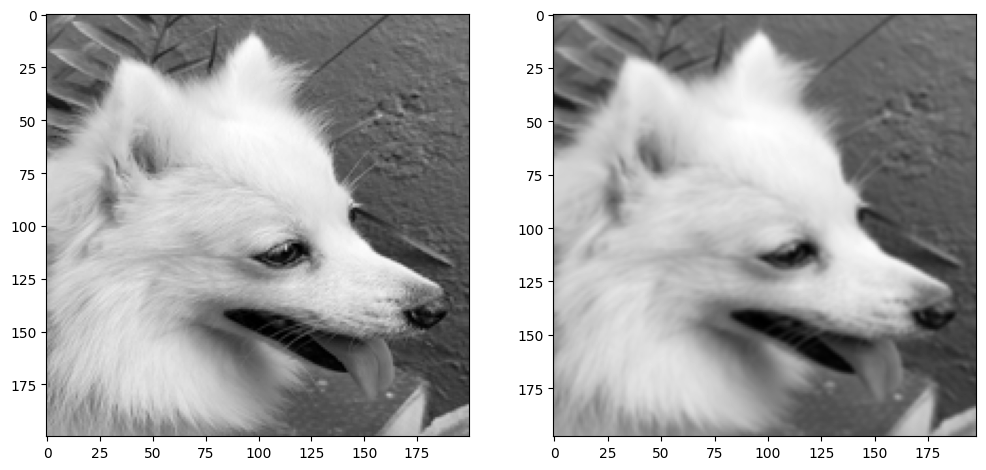

In [16]:
_,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(image_blur,cmap = 'gray')

### Sharpened Image

In [17]:
image_sharp = convolution(img = np.array(img), kernel = sharp)

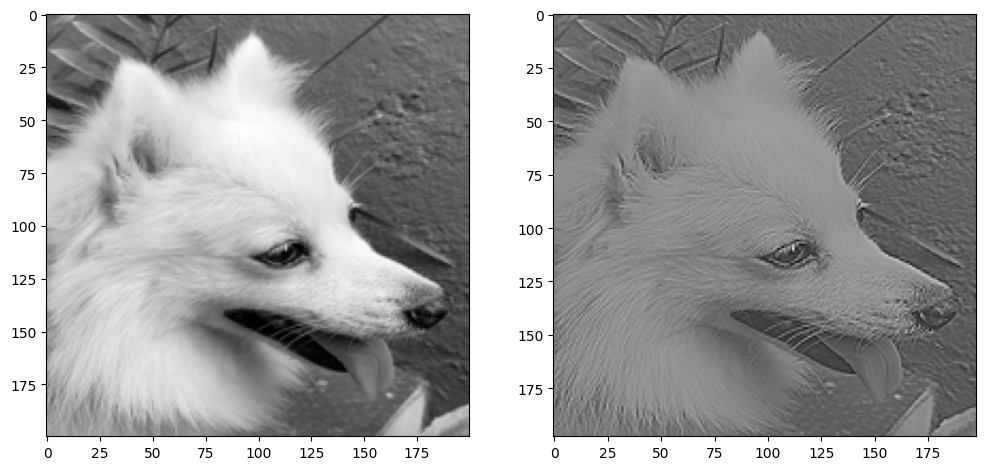

In [18]:
_,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(image_sharp,cmap = 'gray')

### Outlined Image

In [19]:
image_outline= convolution(img = np.array(img), kernel = outline)

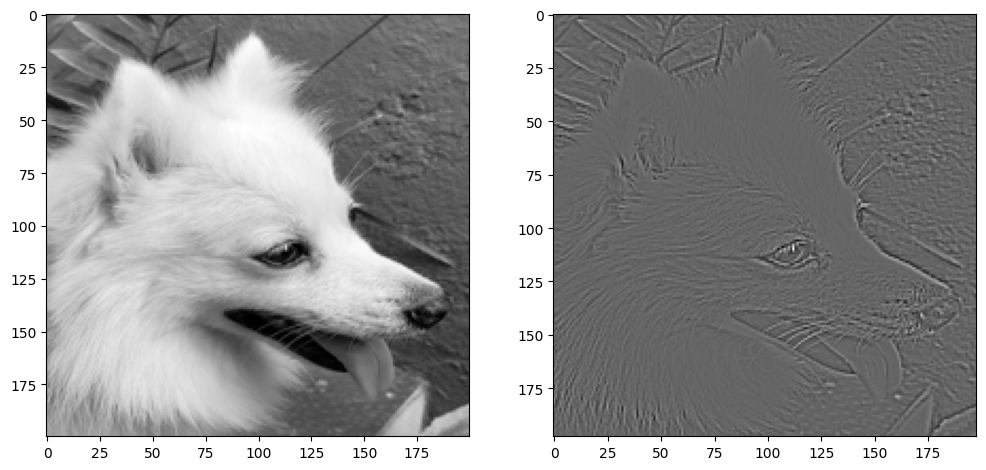

In [20]:
_,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(image_outline,cmap = 'gray')

### 3-d Enhancement

In [22]:
image_emboss= convolution(img = np.array(img), kernel = emboss)

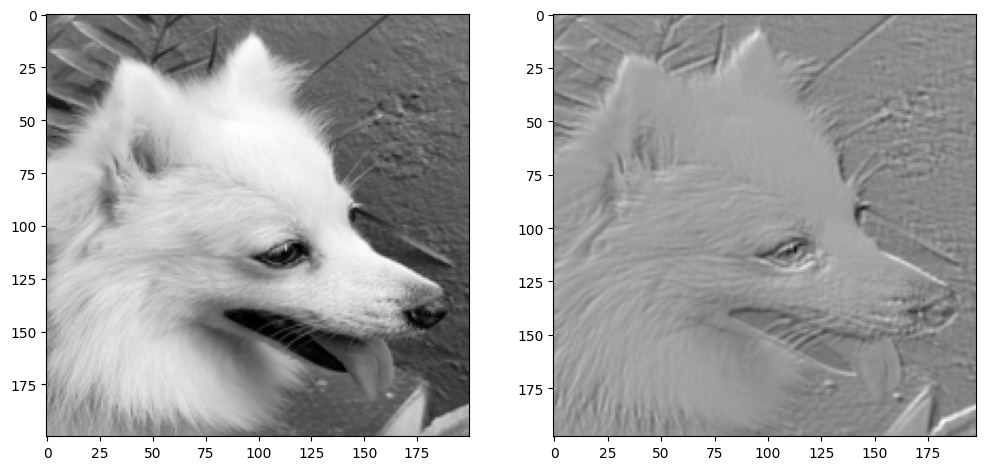

In [27]:
_,ax = plt.subplots(1,2,figsize = (12,6))
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(image_emboss,cmap = 'gray')